In [261]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpt

In [197]:
df = pd.read_pickle('real_results.pickle')
df.head()


SCIENTSBANK                                          \
                           2-way                         3-way             
                              UA        UQ        UD        UA        UQ   
FT-2_Epochs: GPT-3.5    0.800927  0.788025  0.756222  0.687841  0.688834   
FT-3_Epochs: GPT-3.5     0.79326  0.776246  0.745675  0.624715  0.665013   
GPT-3.5                     <NA>  0.717633      <NA>      <NA>  0.604587   
GPT-4                       <NA>  0.797703      <NA>      <NA>  0.712153   

                                  BEETLE                                
                                   2-way               3-way            
                            UD        UA        UQ        UA        UQ  
FT-2_Epochs: GPT-3.5  0.629373  0.739735  0.718640  0.542033  0.534166  
FT-3_Epochs: GPT-3.5  0.646952  0.760877  0.692053  0.580896  0.473811  
GPT-3.5                   <NA>      <NA>  0.670697      <NA>  0.470546  
GPT-4                     <NA>      <NA>  0.737954      <NA>  0.524209

In [198]:
df2 = df.replace(pd.NA, 0).round(2).replace(0, pd.NA)

In [296]:
# DEF LONG_DF
data = []

for i, row in df2.iterrows():
    for j, val in row.items():
        if val is not pd.NA:
            if i == 'GPT-4' or i == 'GPT-3.5':
                data.append([val, i, j[0], j[1], 'N/A'])
            else:
                data.append([val, i, j[0], j[1], j[2]])
        

long_df = pd.DataFrame(data=data, columns=['F1-Score', 'model', 'dataset', 'scale', 'test-state'])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


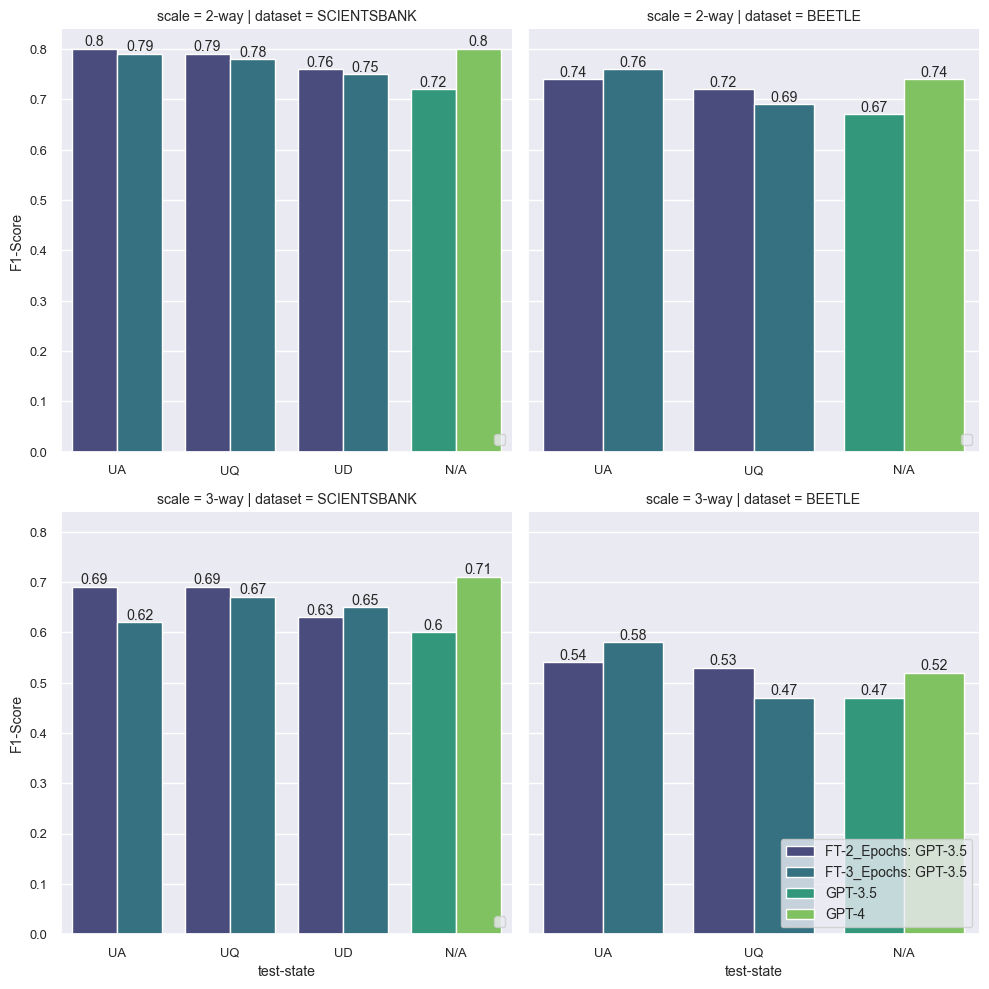

In [317]:
# Figure 6 - This shows all of the data
data_3 = long_df.copy(deep=True)
graph_3 = sns.catplot(data_3, x='test-state', y='F1-Score', hue='model', row='scale', col='dataset', kind='bar', palette='viridis',legend_out=False, sharex=False)
sns.set(font_scale=0.85)

item_dict = {
    0 : ([3, 4,5], [0,1,2], [6,7]),
    1 : ([2,3], [0,1], [4,5])
}

def expand_norm_bars(tax, inds : tuple):
    count = 0
    for rect in tax.findobj():
        if type(rect) != mpt.patches.Rectangle:
            continue
        
        if count in inds[1]:
            rect.set_width(rect.get_width() * 2)
        elif count in inds[0]:
            rect.set_x(rect.get_x() + rect.get_width())
            rect.set_width(rect.get_width() * 2)
        elif count == inds[2][0]:
            rect.set_x(rect.get_x() - rect.get_width() * 2)
            rect.set_width(rect.get_width() * 2)
        elif count == inds[2][1]:
            rect.set_x(rect.get_x() - rect.get_width())
            rect.set_width(rect.get_width() * 2)
        count += 1


for axs in graph_3.axes:
    for i, ax in enumerate(axs):
        expand_norm_bars(ax, item_dict[i])
        ax.legend(loc='lower right', fontsize=10)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.bar_label(ax.containers[2])
        ax.bar_label(ax.containers[3])
        

graph_3.savefig('plots/figure_6.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


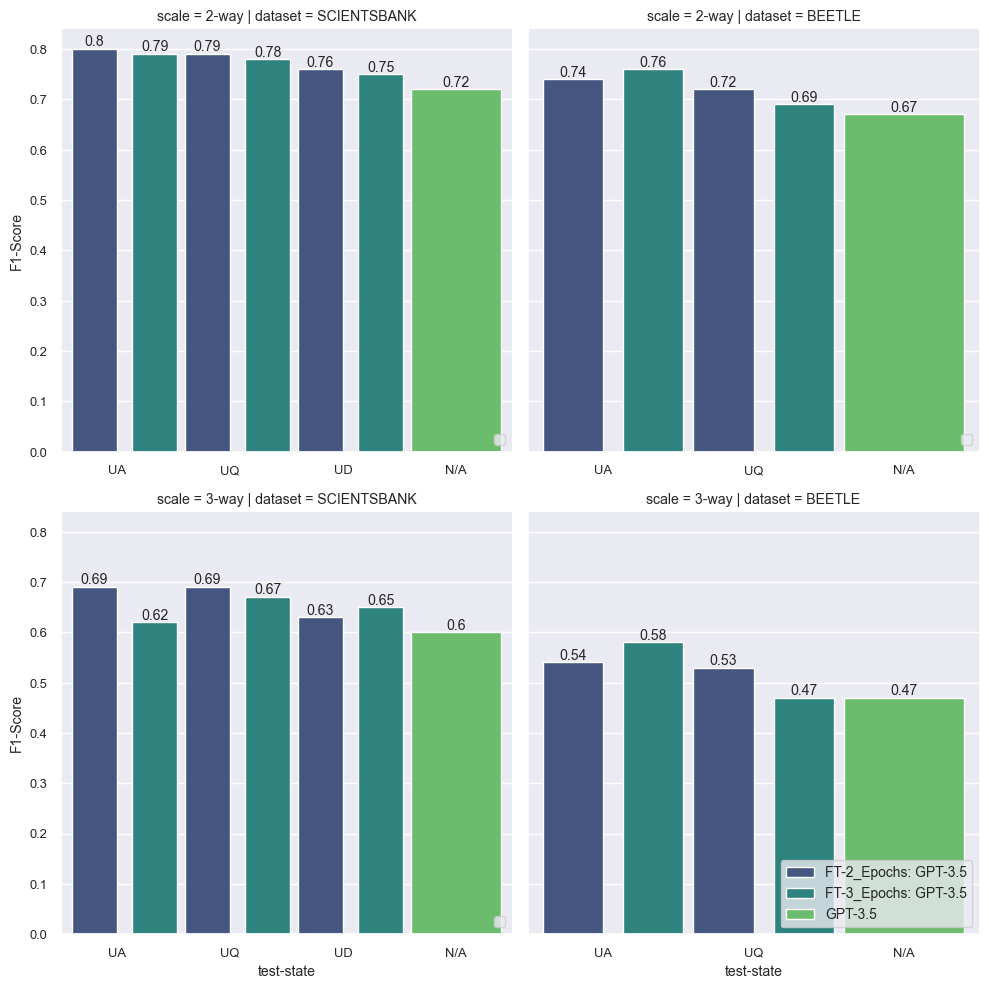

In [328]:
# Figure 7 - This shows base GPT-3.5 vs the fine tuned models
data_4 = long_df[long_df['model'].isin(['GPT-3.5', 'FT-2_Epochs: GPT-3.5', 'FT-3_Epochs: GPT-3.5'])]

graph_4 = sns.catplot(data_4, x='test-state', y='F1-Score', hue='model', row='scale', col='dataset', kind='bar', palette='viridis',legend_out=False, sharex=False)
sns.set(font_scale=0.85)

item_dict = {
    0 : ([3, 4,5], [0,1,2], [6, None]),
    1 : ([2,3], [0,1], [4, None])
}

def expand_norm_bars(tax, inds : tuple):
    count = 0
    for rect in tax.findobj():
        if type(rect) != mpt.patches.Rectangle:
            continue
        
        if count in inds[1]:
            rect.set_width(rect.get_width() * 1.5)
        elif count in inds[0]:
            rect.set_x(rect.get_x() + rect.get_width())
            rect.set_width(rect.get_width() * 1.5)
        elif count == inds[2][0]:
            rect.set_x(rect.get_x() - rect.get_width() * 2)
            rect.set_width(rect.get_width() * 3)
        elif count == inds[2][1]:
            rect.set_x(rect.get_x() - rect.get_width())
            rect.set_width(rect.get_width() * 3)
        count += 1


for axs in graph_4.axes:
    for i, ax in enumerate(axs):
        expand_norm_bars(ax, item_dict[i])
        ax.legend(loc='lower right', fontsize=10)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.bar_label(ax.containers[2])

        

graph_4.savefig('plots/figure_7.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


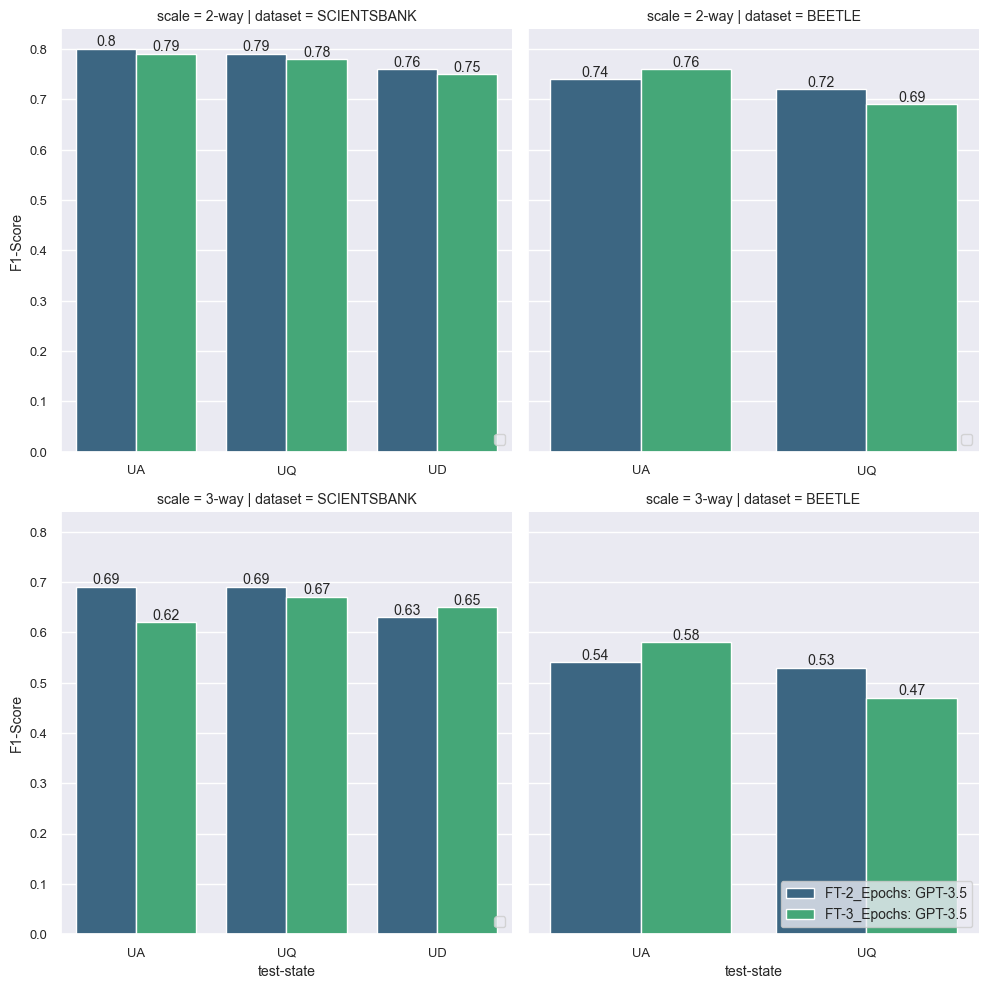

In [330]:
# Figure 8 - This shows the fine tuned models versus each other

data_5 = long_df[long_df['model'].isin(['FT-2_Epochs: GPT-3.5', 'FT-3_Epochs: GPT-3.5'])]

graph_5 = sns.catplot(data_5, x='test-state', y='F1-Score', hue='model', row='scale', col='dataset', kind='bar', palette='viridis',legend_out=False, sharex=False)
sns.set(font_scale=0.85)

item_dict = {
    0 : ([3, 4,5], [0,1,2], [6, None]),
    1 : ([2,3], [0,1], [4, None])
}

def expand_norm_bars(tax, inds : tuple):
    count = 0
    for rect in tax.findobj():
        if type(rect) != mpt.patches.Rectangle:
            continue
        
        if count in inds[1]:
            rect.set_width(rect.get_width() * 1.5)
        elif count in inds[0]:
            rect.set_x(rect.get_x() + rect.get_width())
            rect.set_width(rect.get_width() * 1.5)
        elif count == inds[2][0]:
            rect.set_x(rect.get_x() - rect.get_width() * 2)
            rect.set_width(rect.get_width() * 3)
        elif count == inds[2][1]:
            rect.set_x(rect.get_x() - rect.get_width())
            rect.set_width(rect.get_width() * 3)
        count += 1


for axs in graph_5.axes:
    for i, ax in enumerate(axs):
        # expand_norm_bars(ax, item_dict[i])
        ax.legend(loc='lower right', fontsize=10)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])


        

graph_5.savefig('plots/figure_8.png')

/Users/mustafakhan/opt/anaconda3/envs/ASAG_1/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


24


<Figure size 500x500 with 0 Axes>

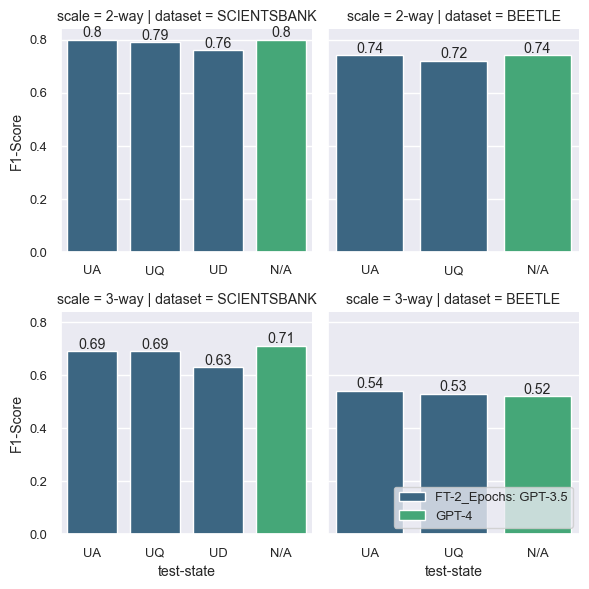

In [332]:
# Figure 9 - All of GPT-4 vs FT 2 epoch
plt.figure(figsize=(5,5))
data_2 = long_df[long_df['model'].isin(['GPT-4', 'FT-2_Epochs: GPT-3.5'])]
graph_2 = sns.FacetGrid(data_2, row='scale', col='dataset', hue='model', sharex=False, height= 3, palette='viridis')
graph_2.map(sns.barplot, 'test-state', 'F1-Score')
print(graph_2.__sizeof__())
plt.legend(loc='lower right')

for gax in graph_2.axes:
    for ax in gax:
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        

graph_2.savefig('plots/figure_9.png')

# graph_3 = sns.catplot(data_2, kind='bar', x='scale', y='F1-Score', hue='model', col='dataset') # (sns.barplot(data_2, x='scale', y='F1-Score', color='model').FacetGrid)




<class 'matplotlib.axes._axes.Axes'>


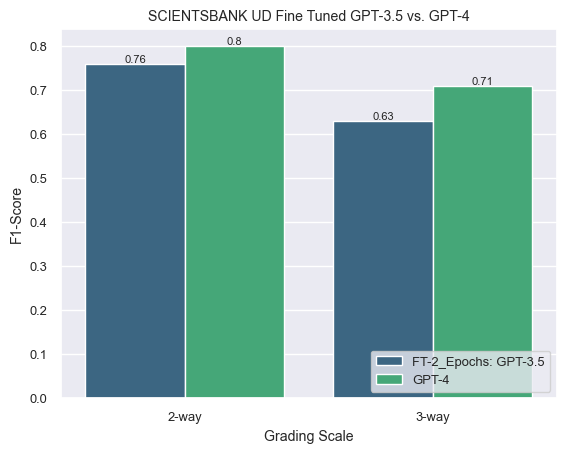

In [334]:
# Figure 10 - UD GPT-4 vs FT 2 epoch

data_1 = long_df[long_df['model'].isin(['FT-2_Epochs: GPT-3.5', 'GPT-4']) & long_df['test-state'].isin(['UD', 'N/A'])]


data_1 = data_1[data_1['dataset'] == 'SCIENTSBANK'][['F1-Score', 'model', 'scale']]



plt.rcParams['font.size'] = 8
ax = sns.barplot(data_1, x='scale', y='F1-Score', hue='model', palette='viridis')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('SCIENTSBANK UD Fine Tuned GPT-3.5 vs. GPT-4')
ax.set_xlabel('Grading Scale')
print(type(ax))
plt.legend(loc='lower right')

plt.savefig('plots/figure_10.png')


